------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

[1] Training Curve Visualization


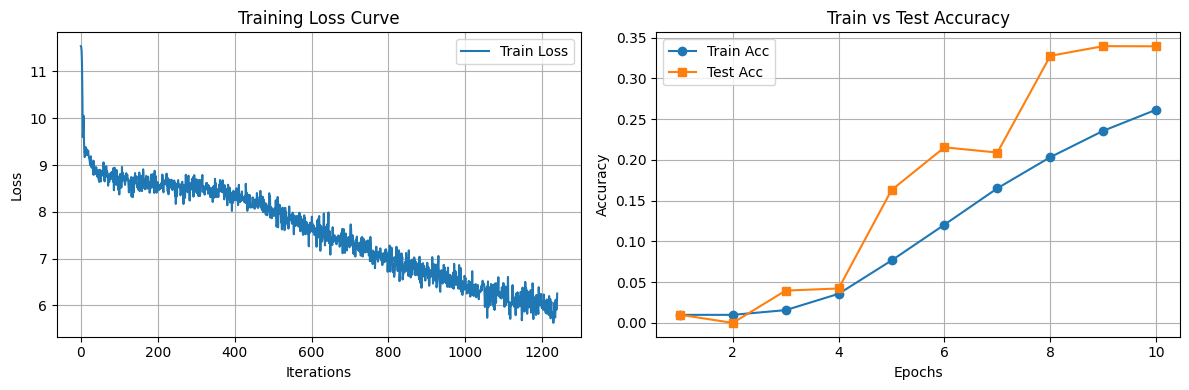


[2] Conv Filter Visualization


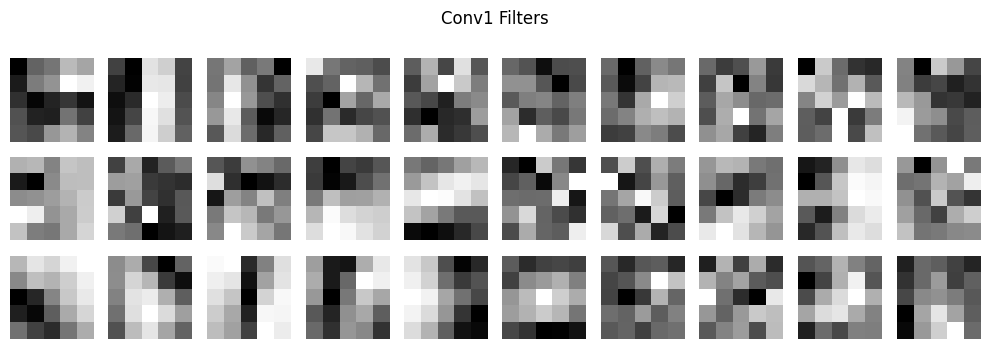

In [1]:
# coding: utf-8
from np import np
import matplotlib.pyplot as plt
import json, glob
from pathlib import Path
from dataset_word import _read_image, _resize_28x28
from wordnet import WordNet
import numpy as _np_cpu

def to_cpu(a):
    try:
        import cupy as cp
        if isinstance(a, cp.ndarray):
            return cp.asnumpy(a)
    except Exception:
        pass
    return a

# ---- 경로 자동 탐색 유틸 ----
def _find_first(candidates):
    for p in candidates:
        path = Path(p)
        if path.exists():
            return path
    return None

def _find_params():
    return _find_first([
        "wordnet_params.npz",
        "DL_project1/wordnet_params.npz",
        "../DL_project1/wordnet_params.npz",
    ])

def _find_vocab():
    return _find_first([
        "data/train/vocab.json",
        "DL_project1/data/train/vocab.json",
        "../DL_project1/data/train/vocab.json",
        "DL_project1/data/vocab.json",
        "../DL_project1/data/vocab.json",
    ])

def _find_example_png():
    for pat in [
        "data/test/*.png",
        "DL_project1/data/test/*.png",
        "../DL_project1/data/test/*.png",
    ]:
        files = sorted(glob.glob(pat))
        if files:
            return Path(files[0])
    return None

# ======== [1] 학습 로그 시각화 ========
def plot_training_curves():
    loss_file = _find_first(["train_loss.txt","DL_project1/train_loss.txt"])
    acc_train_file = _find_first(["train_acc.txt","DL_project1/train_acc.txt"])
    acc_test_file  = _find_first(["test_acc.txt","DL_project1/test_acc.txt"])

    if not loss_file or not loss_file.exists():
        print("train_loss.txt not found")
        return

    train_loss = _np_cpu.loadtxt(loss_file) if loss_file.exists() else []
    train_acc  = _np_cpu.loadtxt(acc_train_file) if (acc_train_file and acc_train_file.exists()) else []
    test_acc   = _np_cpu.loadtxt(acc_test_file) if (acc_test_file and acc_test_file.exists()) else []

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1); plt.plot(train_loss, label='Train Loss')
    plt.xlabel("Iterations"); plt.ylabel("Loss"); plt.title("Training Loss Curve"); plt.grid(True); plt.legend()

    if len(train_acc)>0 and len(test_acc)>0:
        epochs = _np_cpu.arange(1, len(train_acc)+1)
        plt.subplot(1,2,2)
        plt.plot(epochs, train_acc, marker='o', label='Train Acc')
        plt.plot(epochs, test_acc, marker='s', label='Test Acc')
        plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.title("Train vs Test Accuracy"); plt.grid(True); plt.legend()

    plt.tight_layout(); plt.show()

# ======== [2] Conv 필터 시각화 ========
def visualize_conv_filters(param_path: Path|None=None):
    param_path = param_path or _find_params()
    if not param_path or not param_path.exists():
        print("model parameters(.npz) not found")
        return
    params = _np_cpu.load(param_path)
    W1 = params["W1"]
    if "W1" not in params:
        print("No \"W1\" found in parameter file")
        return

    W1 = to_cpu(params["W1"])  # (F, 1, 5, 5)
    num_filters = W1.shape[0]
    cols = 10; rows = (num_filters + cols - 1)//cols
    plt.figure(figsize=(cols, rows*1.2))
    for i in range(num_filters):
        plt.subplot(rows, cols, i+1)
        plt.imshow(W1[i,0], cmap='gray'); plt.axis('off')
    plt.suptitle("Conv1 Filters"); plt.tight_layout(); plt.show()

# _____실행_____
if __name__ == "__main__":
    print("[1] Training Curve Visualization"); plot_training_curves()
    print("\n[2] Conv Filter Visualization");  visualize_conv_filters()